In [4]:
import torch

In [5]:
words = open("names.txt").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

**BIGRAM**

In [6]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(ch1,"\t",ch2)

In [7]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [8]:
sorted(b.items(), key=lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [22]:
N = torch.zeros((27,27), dtype = torch.int32)

In [23]:
chrs = sorted(set(list(''.join(words))))

In [24]:
stoi = {s:i+1 for i,s in enumerate(chrs)}
stoi['.'] = 0  # add the special start/end character
itos = {i:s for s,i in stoi.items()}

In [25]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        i = stoi[ch1]
        j = stoi[ch2]
        N[i,j] += 1


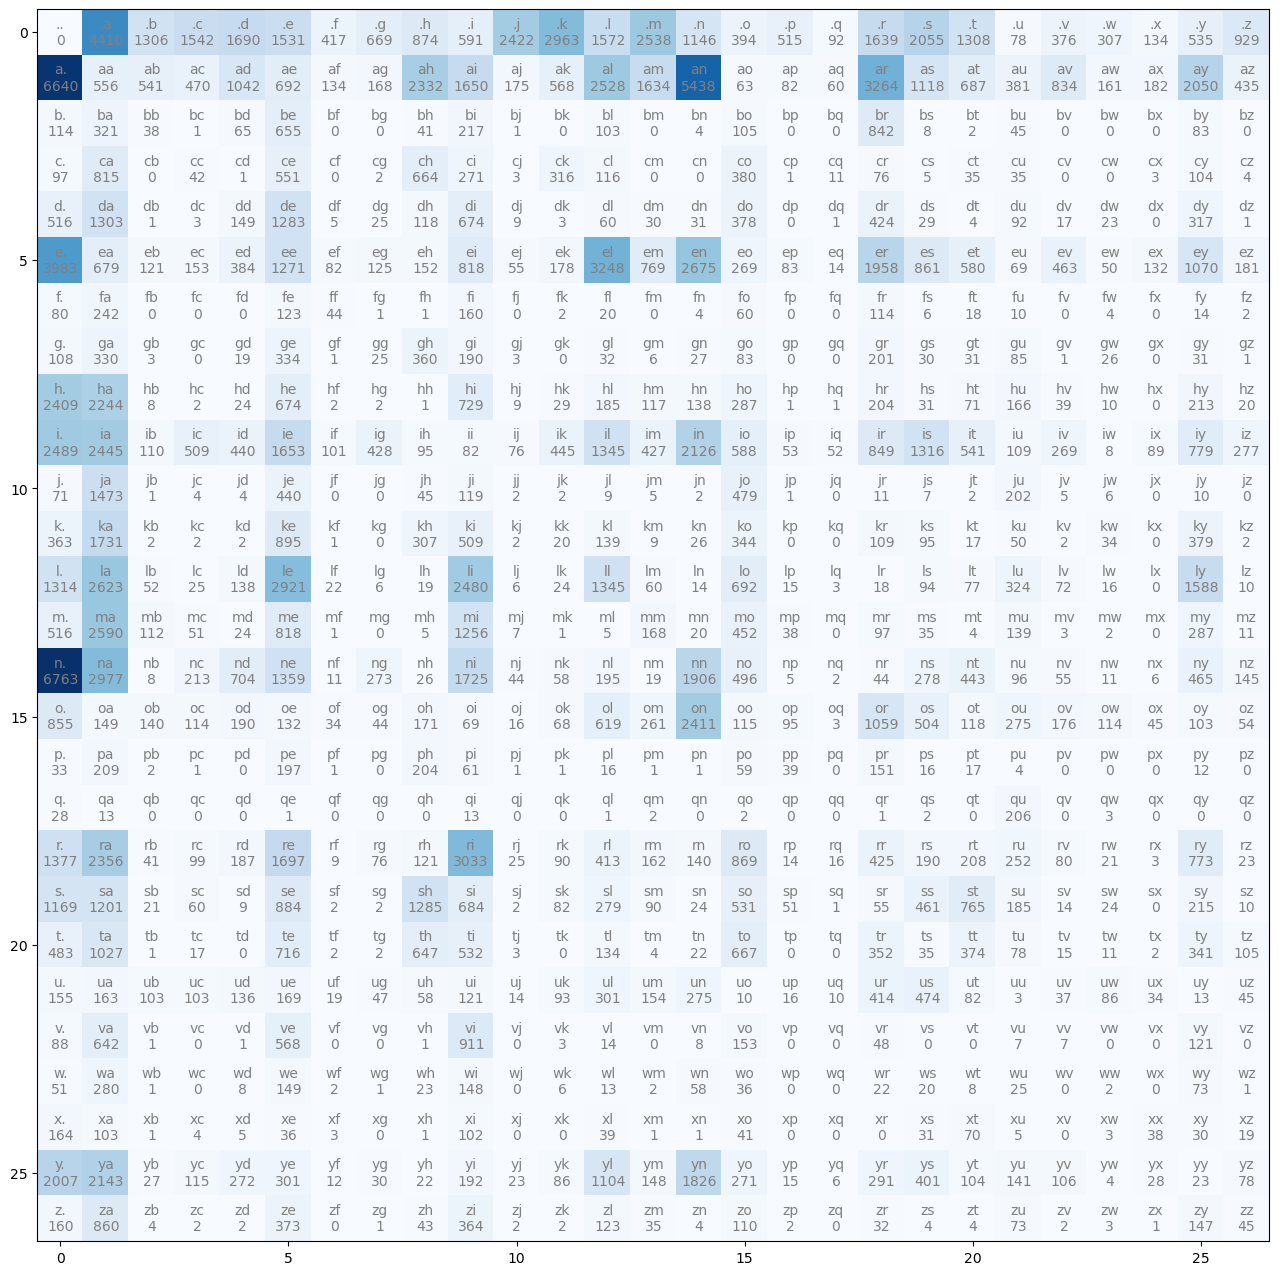

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr + "\n" + str(N[i,j].item()), ha='center', va='center', color='gray')

In [148]:
# p = N.float() 
p = (N+1).float()  # add-one smoothing
p = p/p.sum(dim=1, keepdim=True)  # normalize rows to sum to 1
p.shape
# plt.figure(figsize=(16,16))
# plt.imshow(p, cmap='Blues')
# for i in range(27):
#     for j in range(27):
#         chstr = itos[i] + itos[j]
#         plt.text(j, i, chstr + "\n" + str(round(p[i,j].item(),2)), ha='center', va='center', color='gray')

torch.Size([27, 27])

In [149]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(10):
    out = []
    ix = 0
    while True:
        p_next = p[ix]
        ix = torch.multinomial(p_next, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out[:-1]))  # chop off the <E> at the end


cexze
momasurailezitynn
konimittain
llayn
ka
da
staiyaubrtthrigotai
moliellavo
ke
teda


In [150]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(10):
    out = []
    ix = 0
    while True:
        p_next = p[ix]
        ix = torch.multinomial(p_next, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out[:-1]))  # chop off the <E> at the end

cexze
momasurailezitynn
konimittain
llayn
ka
da
staiyaubrtthrigotai
moliellavo
ke
teda


In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given   some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable.

GOAL: maximize likelihood of the data w.r.t. model arameters (statistical modeling )

Equivalent to maximizing the log Likelihood (because log is monotonic)

Equivalent to minimizing the negative log Likelihood

Equivalent to minimizing the average negative log Likelihood

log(a * b * c) = log(a) + log(b) + log(c)

In [151]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        i = stoi[ch1]
        j = stoi[ch2]

        prob = p[i,j]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')


log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


We can check with our own word also

See, here in some cases there is **0 probability** like 'jq' and we get **inf.**

To avoid this, we can do model smoothing, by initialising the count for prob in N to 1 or more

>p = (N+1).float()

In [152]:
log_likelihood = 0.0
n = 0

# for w in words:
w = 'prathameshjq'
chs = ['.'] + list(w) + ['.']
for ch1,ch2 in zip(chs, chs[1:]):
    i = stoi[ch1]
    j = stoi[ch2]

    prob = p[i,j]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f'{ch1}{ch2}: {prob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')


.p: 0.0161
pr: 0.1443
ra: 0.1852
at: 0.0203
th: 0.1158
ha: 0.2937
am: 0.0482
me: 0.1228
es: 0.0422
sh: 0.1581
hj: 0.0013
jq: 0.0003
q.: 0.0970
log_likelihood=tensor(-42.1240)
nll=tensor(42.1240)
3.2403085231781006
